## Pattern Recognition
### Assignment 2  
#### Group 4:

- COE18B056 - Thigulla Vamsi Krishna
- COE18B065 - Srinivasan R Sharma
- CED18I039 - Paleti Krishnasai

**Q6. Consider the 128- dimensional feature vectors given in the “face feature vectors.csv” file.
Use this information to design and implement a Bayes Classifier.**

**Dataset Specifications:**
* Total number of samples = 800
* Number of classes = 2 ( labelled as “male” and “female”)
* Samples from “1 to 400” belongs to class “male”
* Samples from “401 to 800” belongs to class “female”
* Number of samples per class = 400

**Use the following information to design classifier:**
* Number of test feature vectors ( first 5 in each class) = 5
* Number of training feature vectors ( remaining 395 in each class) = 395
* Number of dimensions = 128

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
dataset = pd.read_csv('face_feature_vectors.csv')
dataset.head()

,gender,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,0.114907,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,0.173457,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135


In [3]:
dataset['gender'].unique()

array(['male', 'female'], dtype=object)

In [4]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,-0.104053,0.084807,0.062869,-0.053774,-0.107821,-0.011964,-0.009948,-0.118558,0.153088,-0.079204,...,0.058338,0.056193,0.007966,-0.009695,-0.132240,-0.102711,0.037940,-0.027949,0.011944,0.033123
std,0.054530,0.049666,0.050815,0.048149,0.052743,0.051714,0.046924,0.050573,0.052975,0.055618,...,0.044437,0.045183,0.045441,0.054372,0.049136,0.050857,0.052326,0.048683,0.049649,0.047527
min,-0.267797,-0.054583,-0.089245,-0.207707,-0.275514,-0.185951,-0.153952,-0.251388,-0.000166,-0.251981,...,-0.072522,-0.063693,-0.147997,-0.157915,-0.306778,-0.237076,-0.136356,-0.183951,-0.133074,-0.117358
25%,-0.142035,0.053606,0.028167,-0.085539,-0.142853,-0.046436,-0.041350,-0.153328,0.117660,-0.118976,...,0.027636,0.024978,-0.024030,-0.047912,-0.167219,-0.137954,0.003237,-0.060721,-0.021150,0.001710
50%,-0.102926,0.085706,0.063450,-0.055316,-0.109049,-0.013578,-0.010679,-0.120824,0.153691,-0.080377,...,0.058197,0.055114,0.007431,-0.010405,-0.133212,-0.102956,0.038909,-0.027575,0.012310,0.030950
75%,-0.065398,0.117294,0.098683,-0.022354,-0.071827,0.024284,0.021921,-0.083453,0.187610,-0.043855,...,0.088667,0.087158,0.039531,0.028696,-0.097804,-0.068964,0.073774,0.004269,0.045568,0.063267
max,0.060631,0.228937,0.213884,0.079872,0.051169,0.160041,0.124839,0.031182,0.305501,0.085257,...,0.182162,0.213782,0.141647,0.185726,0.004269,0.048952,0.189825,0.117166,0.161575,0.187176


In [5]:
dataset.shape

(800, 129)

In [6]:
dataset.isnull().values.any()

False

In [7]:
train_data = dataset.groupby('gender').apply(lambda x: x.tail(395)).reset_index(drop=True)
test_data = dataset.groupby('gender').apply(lambda x: x.head(5)).reset_index(drop=True)
X_train, y_train = train_data.iloc[:, 1:], train_data.iloc[:, 0]
X_test, y_test = test_data.iloc[:, 1:], test_data.iloc[:, 0]

In [8]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.048322,0.063833,0.110804,-0.096333,-0.145212,0.008218,0.012496,-0.056971,0.152069,-0.111843,...,0.036783,0.064837,0.140861,-0.063511,-0.156427,-0.067221,0.025938,0.016019,0.016852,0.140859
1,-0.102973,0.046464,0.019684,-0.087742,-0.086486,-0.044946,-0.088026,-0.248814,0.113202,-0.194038,...,0.091401,0.096097,0.019656,0.017288,-0.176065,-0.060538,0.095438,-0.088858,0.049312,0.019009
2,-0.134824,0.093314,0.103505,-0.054522,-0.066692,-0.039892,-0.005544,-0.140088,0.200389,-0.094897,...,-0.043587,0.042913,-0.062721,-0.065257,-0.232838,-0.136345,0.017268,-0.102133,0.014161,0.011314
3,-0.086950,0.104945,0.093125,-0.138791,-0.111283,-0.078399,-0.063179,-0.155705,0.091851,-0.131250,...,0.125923,0.069823,0.081179,0.004632,-0.121078,-0.018539,0.092550,-0.081236,0.073335,0.056886
4,-0.175767,0.116333,0.115592,-0.096357,-0.170592,-0.066278,-0.008707,-0.243519,0.179446,-0.082654,...,0.099797,0.065767,0.077045,-0.037515,-0.034411,-0.007611,0.015471,-0.101554,0.021221,0.064972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,-0.139066,0.141988,0.070456,-0.003518,-0.065637,-0.037767,-0.094195,-0.195665,0.070896,-0.044215,...,0.125822,0.039625,0.067861,0.134050,-0.178726,-0.100577,0.015707,-0.005463,0.001857,0.079183
786,-0.129449,0.132177,0.055916,-0.009390,-0.080541,-0.072362,-0.067433,-0.192243,0.108654,-0.052347,...,0.142675,0.028204,-0.010465,0.002703,-0.117138,-0.148947,0.054327,0.004200,0.046730,0.037774
787,-0.158460,0.109948,0.019088,0.015506,-0.069668,0.032311,0.015062,-0.140817,0.141132,-0.036736,...,0.143453,0.059608,-0.006824,0.056758,-0.064352,-0.108518,0.132037,0.050347,0.071465,-0.022954
788,-0.101499,0.119739,0.016951,-0.013677,-0.055524,0.028399,0.028164,-0.152100,0.109814,-0.012079,...,0.046488,0.051044,-0.008298,0.018010,-0.164197,-0.122292,0.032616,-0.030194,-0.018642,0.032821


In [9]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.039844,0.070357,0.130196,-0.007683,-0.077825,-0.021298,-0.024133,-0.085105,0.071288,-0.121256,...,0.105510,0.081928,-0.033337,-0.023604,-0.167003,-0.059075,0.053074,0.080940,0.011467,-0.021999
1,0.001747,0.185678,0.073260,0.042142,-0.088674,0.028186,-0.027830,-0.064211,0.097413,-0.010493,...,0.123615,0.030036,0.041442,-0.012818,-0.119177,-0.165786,-0.075368,-0.017690,0.067028,0.036452
2,-0.091598,0.095340,0.072125,-0.092276,-0.079953,0.047782,-0.004701,-0.092005,0.222913,-0.059830,...,0.011370,0.144719,0.089139,-0.059767,-0.111235,-0.055420,0.006283,0.016900,-0.081676,0.022809
3,-0.018751,0.088572,0.068894,-0.065700,-0.115126,0.024339,-0.028420,-0.159320,0.164595,-0.116339,...,0.010345,0.095309,0.012255,-0.033010,-0.097720,-0.218889,0.077764,0.045943,0.010856,0.100522
4,-0.130889,0.093262,0.122244,-0.110014,-0.157625,-0.036781,0.073908,-0.098571,0.120419,-0.016198,...,0.003229,0.049330,0.059733,-0.023820,-0.098432,-0.034316,0.075131,-0.029204,-0.020707,0.031028
5,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,-0.044872,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
6,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,-0.044821,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
7,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,-0.052085,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
8,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,0.114907,-0.056267,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
9,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,0.173457,-0.011889,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135


In [10]:
y_train

0      female
1      female
2      female
3      female
4      female
        ...  
785      male
786      male
787      male
788      male
789      male
Name: gender, Length: 790, dtype: object

In [11]:
type(y_test)

pandas.core.series.Series

In [12]:
class NaiveBayesClassifier():
    '''
    Bayes Theorem form
    P(y|X) = P(X|y) * P(y) / P(X)
    '''
    def calc_prior(self, features, target):
        '''
        prior probability P(y)
        calculate prior probabilities
        '''
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()

        return self.prior
    
    def calc_statistics(self, features, target):
        '''
        calculate mean, variance for each column and convert to numpy array
        ''' 
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        '''
        calculate probability from gaussian density function (normally distributed)
        we will assume that probability of specific target value given specific class is normally distributed 
        
        probability density function derived from wikipedia:
        (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²)), where μ is mean, σ² is variance, σ is quare root of variance (standard deviation)
        '''
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
#         numerator = np.exp(-((x-mean)**2 / (2 * var)))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for i in range(self.count):
            prior = np.log(self.prior[i]) ## use the log to make it more numerically stable
            conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable
            posterior = prior + conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
     

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy

    def visualize(self, y_true, y_pred, target):
        
        tr = pd.DataFrame(data=y_true, columns=[target])
        pr = pd.DataFrame(data=y_pred, columns=[target])
        
        
        fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))
        
        sns.countplot(x=target, data=tr, ax=ax[0], palette='viridis', alpha=0.7, hue=target, dodge=False)
        sns.countplot(x=target, data=pr, ax=ax[1], palette='viridis', alpha=0.7, hue=target, dodge=False)
        

        fig.suptitle('True vs Predicted Comparison', fontsize=20)

        ax[0].tick_params(labelsize=12)
        ax[1].tick_params(labelsize=12)
        ax[0].set_title("True values", fontsize=18)
        ax[1].set_title("Predicted values", fontsize=18)
        plt.show()

In [13]:
G4 = NaiveBayesClassifier()

In [14]:
mean, variance = G4.calc_statistics(X_train, y_train)

In [15]:
G4.fit(X_train, y_train)
predictions = G4.predict(X_test)

In [16]:
G4.accuracy(y_test, predictions)

0.8

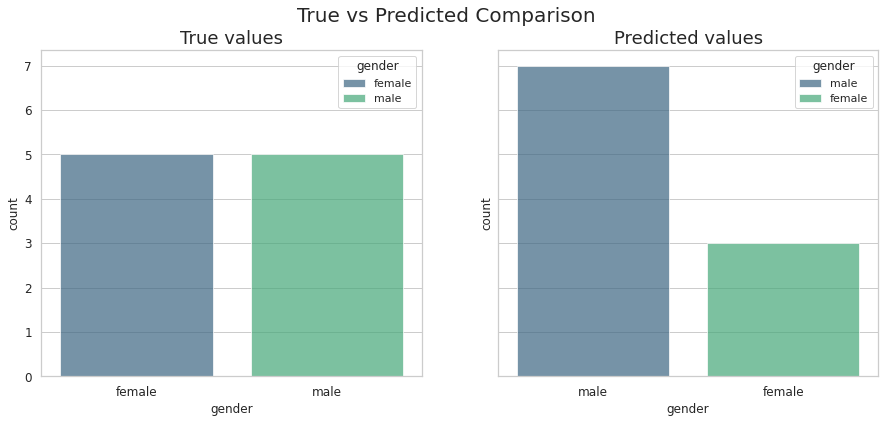

In [17]:
G4.visualize(y_test, predictions, 'gender')